## ALl important codes

In [ ]:
# fliping a numpy array
arr=numpy.flipud(arr)#Flip an array vertically.
arr=numpy.flip(arr)#Reverse the order of elements in an array along the given axis.
arr=numpy.fliplr(arr)#Flip an array horizontally.


#find the type of a variable
x=type(variable)


#Load an image from directory
from keras.preprocessing import image
test_image = image.load_img(filename, target_size=(45, 45, 3))


#Convert image to numpy array
test_image = image.img_to_array(test_image)

#Convert Numpy array to PIL image



#Expand dimensions of a numpy array 
import numpy as np
test_image = np.expand_dims(test_image, axis=0)


#Display a plot by giving numpy array as argument
import matplotlib.pyplot as plt
plt.imshow(array)
plt.show()


## Files are already downloaded and extracted. Links will be provided afterwards

In [6]:
import os,codecs,numpy

# PROVIDE YOUR Digit DIRECTORY WITH THE EXTRACTED FILES HERE
datapath = '../Dataset/DigitMNIST/'

files = os.listdir(datapath)

def get_int(b):   # CONVERTS 4 BYTES TO A INT
    return int(codecs.encode(b, 'hex'), 16)

data_dict = {}
for file in files:
    if file.endswith('ubyte'):  # FOR ALL 'ubyte' FILES
        print('Reading ',file)
        with open (datapath+file,'rb') as f:
            data = f.read()
            magicNumber = get_int(data[:4])   # 0-3: THE MAGIC NUMBER TO WHETHER IMAGE OR LABEL
            length = get_int(data[4:8])  # 4-7: LENGTH OF THE ARRAY  (DIMENSION 0)
            if (magicNumber == 2051):
                category = 'images'
                num_rows = get_int(data[8:12])  # NUMBER OF ROWS  (DIMENSION 1)
                
                num_cols = get_int(data[12:16])  # NUMBER OF COLUMNS  (DIMENSION 2)
                
                parsed = numpy.frombuffer(data,dtype = numpy.uint8, offset = 16)  # READ THE PIXEL VALUES AS INTEGERS
                parsed=numpy.rot90(parsed,axes=(0, 1))
#                 
                parsed = parsed.reshape(length,num_rows,num_cols)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES x HEIGHT x WIDTH]           
            elif(magicNumber == 2049):
                category = 'labels'
                parsed = numpy.frombuffer(data, dtype=numpy.uint8, offset=8) # READ THE LABEL VALUES AS INTEGERS
#                 print(type(parsed))
                parsed=numpy.rot90(parsed,axes=(0, 1))
#                 parsed=numpy.flip(parsed)
                parsed = parsed.reshape(length)  # RESHAPE THE ARRAY AS [NO_OF_SAMPLES]                           
            if (length==40000):
                set = 'test'
            elif (length==240000):
                set = 'train'
            data_dict[set+'_'+category] = parsed  # SAVE THE NUMPY ARRAY TO A CORRESPONDING KEY

Reading  emnist-digits-test-images-idx3-ubyte


ValueError: Axes must be different.

In [ ]:
import os
from skimage.io import imsave
datapath = '../Dataset/DigitMNIST/' # PATH WHERE IMAGES WILL BE SAVED

sets = ['train','test']

for set in sets:   # FOR TRAIN AND TEST SET
    images = data_dict[set+'_images']   # IMAGES
    labels = data_dict[set+'_labels']   # LABELS
    no_of_samples = images.shape[0]     # NUBMER OF SAMPLES
    for indx in range (no_of_samples):  # FOR EVERY SAMPLE
        print(set, indx)
        image = images[indx]            # GET IMAGE
        label = labels[indx]            # GET LABEL
        
        if not os.path.exists(datapath+set+'/'+str(label)+'/'):    # IF DIRECTORIES DO NOT EXIST THEN 
            os.makedirs (datapath+set+'/'+str(label)+'/')       # CREATE TRAIN/TEST DIRECTORY AND CLASS SPECIFIC SUBDIRECTORY
        filenumber = len(os.listdir(datapath+set+'/'+str(label)+'/'))  # NUMBER OF FILES IN THE DIRECTORY FOR NAMING THE FILE
        imsave(datapath+set+'/'+str(label)+'/%05d.png'%(filenumber),image)  # SAVE THE IMAGE WITH PROPER NAME

In [2]:
import os
from skimage.io import imsave
from matplotlib import pyplot as plt
from PIL import Image
datapath = '../Dataset/DigitMNIST/' # PATH WHERE IMAGES WILL BE SAVED

sets = ['train','test']

for set in sets:   # FOR TRAIN AND TEST SET
    images = data_dict[set+'_images']   # IMAGES
    labels = data_dict[set+'_labels']   # LABELS
    no_of_samples = images.shape[0]     # NUBMER OF SAMPLES
    for indx in range (no_of_samples):  # FOR EVERY SAMPLE
        print(set, indx)
        image = images[indx]            # GET IMAGE
        label = labels[indx]            # GET LABEL
        img = Image.fromarray(image)
        print(label)
        plt.imshow(img)
        plt.show()
        
       

KeyError: 'train_images'

<class 'numpy.ndarray'>


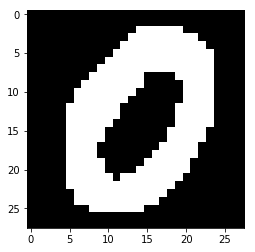

In [9]:

import cv2
import numpy as np
img = cv2.imread('image4.png')
kernel = np.ones((3,3),np.uint8)
dilation = cv2.dilate(img,kernel,iterations = 1)
print(type(dilation))
import matplotlib.pyplot as plt
plt.imshow(dilation)
plt.show()